In [137]:
from bs4 import BeautifulSoup
from splinter import Browser
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from webdriver_manager.chrome import ChromeDriverManager

In [138]:
#Use splinter to visit website instead of request 
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [139]:
# URL of page to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html' 
browser.visit(url)

In [140]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(browser.html, 'html.parser')

In [141]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
  <meta content="Hugo 0.84.0" name="generator"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
  <!-- Bootstrap core CSS -->
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
  <style>
   .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
 </head>
 <body>
  <mai

In [142]:
list = pd.read_html(url)
list

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [143]:
#KG notes from tutoring: puts one table in the first position of the list. You want a list in that particular index 
mars_df = list[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [144]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [145]:
# Changing terrestrial_date from object to datetime data type
mars_df["terrestrial_date"] = mars_df["terrestrial_date"].astype("datetime64")

mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [146]:
# How many months exist on Mars? 
mars_months = len(mars_df["month"].unique())
mars_months

12

In [147]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
sum = mars_df["sol"].sum()
sum

1896256

In [148]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
min_temp = mars_df.groupby(["month"]).mean()["min_temp"]
min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<BarContainer object of 12 artists>

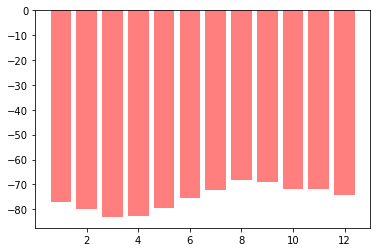

In [149]:
#Plot the results of question 3 as a bar chart 
x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.bar(x_axis, min_temp, color='r', alpha=0.5, align="center")


In [155]:
# Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
pressure = mars_df.groupby(["month"]).mean()["pressure"]
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<BarContainer object of 12 artists>

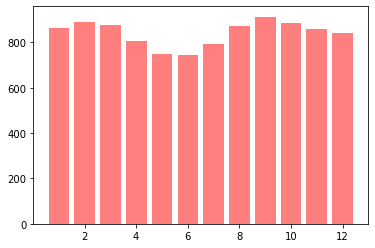

In [156]:
#Plot the results of question 4 
x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.bar(x_axis, pressure, color='r', alpha=0.5, align="center")

In [157]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
earth_days = mars_df.groupby(["month"]).count()["terrestrial_date"]
earth_days

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: terrestrial_date, dtype: int64

<BarContainer object of 12 artists>

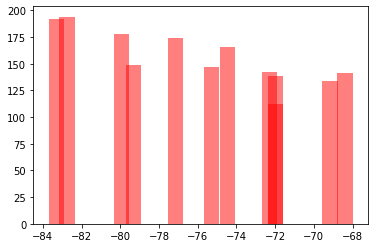

In [153]:
#Plot for questions 4 
plt.bar(min_temp, earth_days, color='r', alpha=0.5, align="center")


In [158]:
# Export DataFrame to a CSV file
mars_df.to_csv('mars.csv')